# <span style="color:darkred"> Variáveis Compostas e Arquivos  
## <span style="color:darkred"> Aplicação em Titulação Potenciométrica 
Vamos mudar a **dinâmica** de nossas aulas, pois neste momento temos o domínio dos **conceitos básicos da linguagem** e agora abordaremos as **variáveis compostas** em **aplicações reais em química**. Vamos conduzir a aula como uma resolução prática da **Determinação da porcentagem de ácido acético em vinagre**, para isso, importaremos dados através da **interação do Excel com o Python**.

\
Todos os dados experimentais que utilizaremos nesta seção foram dados que eu obtive em minha experiência na graduação na disciplina de Laboratório de Análitica Clássica. No final desta seção criaremos um módulo contendo as definições para a aplicação da **Titulação Potenciométrica**.
    
\
O objetivo principal desta seção é criar um **treinamento** para a aplicação de **problemas do cotidiano de laboratório** utilizando os recursos da **linguagem do Python**, de modo que o usuário siga a lógica aplicada no exemplo abordado.
\
\
No meu Google Drive, deixarei dados experimentais de outras práticas para utilizar como treinamento.
\
\
**Link:**
\
https://drive.google.com/drive/folders/1yxZyj3doQOAvfH0O-6JgefvqxULgJ3vE?usp=sharing

# <span style="color:purple"> 1º Passo: Importação de dados com a biblioteca Pandas

Vamos importar o arquivo xlsx contendo os valores de pH e volume de solução padronizada de hidróxido de sódio. Baixe o arquivo **"titulacao_potenciometrica.xlsx"**.
\
\
**Link:** 
\
https://docs.google.com/spreadsheets/d/11Q9tUWoWDxbBrqtIONxxpbotEdKDz5kt/edit?usp=sharing&ouid=105655151372591531914&rtpof=true&sd=true
\
\
Uma vez feito o *upload* do arquivo no diretório, utilizaremos o método **pd.read_excel("nome_do_arquivo.xlsx")**, dessa forma será gerado um **dataframe** do arquivo. Também é possível importar dados em arquivos com a extensão **CSV**, para isso, iremos usar o método **pd.read_csv("nome_do_arquivo.csv", sep=';')**.

In [3]:
import pandas as pd 

In [4]:
def impotar_excel(nome):
    return pd.read_excel(nome)
impotar_excel('titulacao_potenciometrica.xlsx').head()

,V(mL),pH
0,0.0,3.40
1,1.0,3.65
2,2.0,3.93
3,3.0,4.12
4,4.0,4.32


In [5]:
def impotar_csv(nome):
    return pd.read_csv(nome)
dados = impotar_excel('titulacao_potenciometrica.xlsx')

## <span style="color:purple"> Editando DataFrame -Index e renomear colunas 
A edição de um dataframe é composto por dezenas de comandos da biblioteca do Pandas, infelizmente não será possível abordar devidamente todos eles, por isso acesse o link abaixo para obter alguns resumos desta abrangente biblioteca.
    
\
**Acesso aos resumos de algumas bibliotecas do Python**
\
https://drive.google.com/drive/folders/12Bjumxn3Cwf1Ykt7-cPKSDsKbf71NKN2?usp=sharing

### <span style="color:darkblue"> **Tamanho do dataframe**

Vamos entender o tamanho de um dataframe através do comando **shape**.

In [6]:
dados.shape[1]

2

### <span style="color:darkblue"> **Métodos index e columns**

Como acesar os nomes de colunas e estrutura do index.

In [7]:
dados.columns[1]

'pH'

### <span style="color:darkblue"> **Método reindex()**

Reconstrói o index do dataframe
 - O comando df.index retorna uma *series* do índice do dataframe

In [8]:
def gerar_index(df):
    return df.reindex(list(range(1,df.shape[0])))
dados = gerar_index(dados)
dados.head()

,V(mL),pH
1,1.0,3.65
2,2.0,3.93
3,3.0,4.12
4,4.0,4.32
5,5.0,4.47


### Renomear colunas 
df.rename(columns={'nome_velho':'nome_novo'})

In [9]:
def renomear_colunas(df):
    return df.rename(columns={df.columns[0]:'V', df.columns[1]:'pH'})
dados = renomear_colunas(dados)
dados.head()

,V,pH
1,1.0,3.65
2,2.0,3.93
3,3.0,4.12
4,4.0,4.32
5,5.0,4.47


## <span style="color:purple"> Obtendo informações de um dataframe.
Esta biblioteca fornece métodos que entregam informações de **tendência central e de dispersão** que são importantes para tomar algumas decisões com os dados. Além disso, a biblioteca inclui algumas opções de **visualização de dados**, como, gráficos tipo *scatter*, *box-plot*, *barras* e *histograma*.

### Análise descritiva dos valores de pH
Vamos verificar os dados que são oferecidos com o método de descrição


### df.describe()

In [12]:
dados.describe()

,V,pH
count,36.000000,36.000000
mean,18.125000,7.850556
std,10.127315,3.304809
min,1.000000,3.650000
25%,9.750000,5.025000
50%,18.500000,6.410000
75%,26.250000,11.497500
max,35.000000,12.790000


In [11]:
dados['pH'].std()

3.3048094342677907

### Adicionando coluna com desvio padrão de pH ao DataFrame

In [17]:
dados['Desvio Padrão'] = dados['pH'].std()
dados.head()

,V,pH,Desvio Padrão
1,1.0,3.65,3.304809
2,2.0,3.93,3.304809
3,3.0,4.12,3.304809
4,4.0,4.32,3.304809
5,5.0,4.47,3.304809


In [19]:
dados['std'] = dados['Desvio Padrão'].round(2)
dados.head()

,V,pH,Desvio Padrão,std
1,1.0,3.65,3.304809,3.3
2,2.0,3.93,3.304809,3.3
3,3.0,4.12,3.304809,3.3
4,4.0,4.32,3.304809,3.3
5,5.0,4.47,3.304809,3.3


### Excluindo uma coluna através do método df.drop()

df.drop("Nome_da_coluna", axis = 'columns')\
\
Lembrando que:\
\
axis=0 --> index\
axis=1 --> columns

In [20]:
dados = dados.drop('Desvio Padrão', axis=1)
dados.head()


,V,pH,std
1,1.0,3.65,3.3
2,2.0,3.93,3.3
3,3.0,4.12,3.3
4,4.0,4.32,3.3
5,5.0,4.47,3.3


Para excluir linhas de dataframe, utilize index para 1 linha ou o slice para um intevalo de linhas. Observe abaixo:

In [22]:
dados.drop(dados.index[0:3],axis=0).head()

,V,pH,std
4,4.0,4.32,3.3
5,5.0,4.47,3.3
6,6.0,4.60,3.3
7,7.0,4.71,3.3
8,8.0,4.85,3.3


## <span style="color:purple">Visualizando dados com pandas 
 
Embora os dados experimentais não são adequados para os tipos de representações gráficas abaixo, aplicaremos suas representações gráficas. 

### Gráfco de disperção *Scatter* 
```
df.plot.scatter(x,y)
```

<AxesSubplot:xlabel='V'>

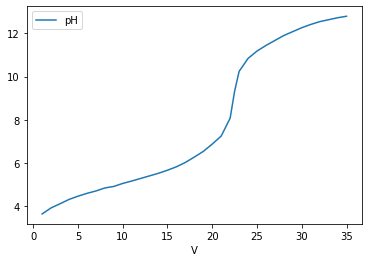

In [330]:
dados.plot(x='V',y='pH')

### Gráfco de Barras
 
```
df.plot.bar()
```

<AxesSubplot:>

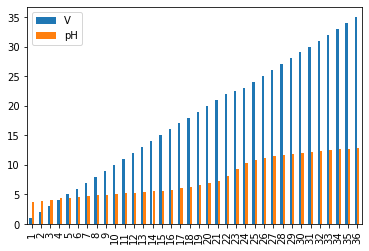

In [331]:
dados.plot.bar()

### Boxplot 
```
df.plot.box()
```

<AxesSubplot:>

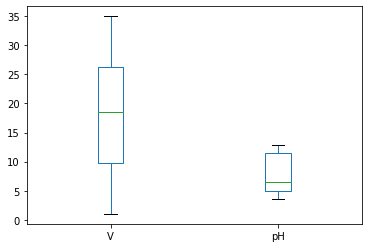

In [332]:
dados.plot.box()

### Histograma
 
```
df.plot.hist()
```

<AxesSubplot:ylabel='Frequency'>

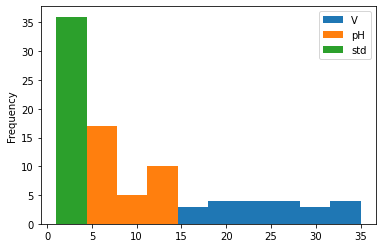

In [24]:
dados.plot.hist()

### Aviso contextual:
Vale salientar que as representações gráficas apresentadas não possuem algum valor na aplicação de titulação potenciométrica, estamos aproveitando este exemplo para apresentar alguns recursos oferecidos pela biblioteca Pandas. 

# <span style="color:purple"> 2º Passo: Tratamento dos dados
Nesta etapa **trataremos os dados** para obter as colunas com os valores da **primeira derivada**, **primeira derivada reversa** e **segunda derivada**. 

## <span style="color:purple">Gerando colunas com os dados das derivadas  
Nesta etapa precisaremos explorar novos métodos da biblioteca Pandas para realizar o **cálculo das derivadas**, neste caso o problema está relacionado em aplicar estes cálculos diretamente aos dados experimentais, ou seja, sem utilizar uma equação que descreva o gráfico. Assim, utilizaremos os seguintes métodos:
\
\
`assign()`
\
Retorna o dataframe juntamente com uma nova coluna que foi gerado através de um kwarg.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html
\
\
`eval()`
\
Avalia uma expressão matemática através de uma *string*, dessa maneira as operações matemáticas são suportadas dentro de uma string.
https://pandas.pydata.org/docs/reference/api/pandas.eval.html
\
\
`diff()`
\
Retorna o cálculo da derivada de dados selecionados.\
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html?highlight=diff#pandas.DataFrame.diff    

In [334]:
# Coluna primeira derivada
def derivar_d1(df):
    return df.assign(d1=df.diff().eval('pH/V').round(2))
dados = derivar_d1(dados)

In [335]:
# Coluna primeira derivada reversa
def derivar_d1r(df):
    return df.assign(d1r=df.diff().eval('V/pH').round(2))
dados = derivar_d1r(dados)

In [336]:
# Coluna segunda derivada
def derivar_d2(df):
    return df.assign(d2=df.diff().eval('d1/V').round(2))
dados = derivar_d2(dados)
dados.head()

,V,pH,d1,d1r,d2
1,1.0,3.65,NaN,NaN,NaN
2,2.0,3.93,0.28,3.57,NaN
3,3.0,4.12,0.19,5.26,-0.09
4,4.0,4.32,0.20,5.00,0.01
5,5.0,4.47,0.15,6.67,-0.05


# <span style="color:purple"> 3º Passo: Visualização dos dados
Precisamos criar uma função que retone em uma única imagem todos os gráficos relacionados à **Titulação Potenciométrica**, para isso, vamos abordar o recurso **pyplot** de **plt.subplot()**. Esta ferramenta possibilita **várias combinações para representação multigráfica**, esta função vai ser muito importante quando desejarmos criar um recurso para salvar os dados, por exemplo, armazenar os dados em um arquivo pdf.\
\
**Material Complementar:** 
\
\
__Matplotlib.Pyplot__
\
https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
\
\
__Referência Style Sheets__
\
https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html

In [337]:
import matplotlib.pyplot as plt
import numpy as np 

In [338]:
def plotar_grafico(df):
    fig, axs = plt.subplots(2,2, figsize=(10,10))
    
    axs[0,0].plot(df['V'],df['pH'], color='green' )
    axs[0,1].plot(df['V'],df['d1'],color='k')
    axs[1,0].plot(df['V'],df['d1r'], color= 'r')
    axs[1,1].plot(df['V'],df['d2'], color= 'darkred')
    
    axs[0,0].grid(color='gray', linestyle='solid')
    axs[0,1].grid(color='gray', linestyle='solid')
    axs[1,0].grid(color='gray', linestyle='solid')
    axs[1,1].grid(color='gray', linestyle='solid')
    
    axs[0,0].set_title('Curva de titulação')
    axs[0,1].set_title('Primeira derivada')
    axs[1,0].set_title('Primeira derivada reversa')
    axs[1,1].set_title('Segunda derivada')
    
    axs[0,0].set_xticks(np.arange(0,35,step=2))
    axs[0,1].set_xticks(np.arange(0,35,step=2))
    axs[1,0].set_xticks(np.arange(0,35,step=2))
    axs[1,1].set_xticks(np.arange(0,35,step=2))
    
    axs[0,0].set_xlabel('V (mL)')
    axs[0,1].set_xlabel('V (mL)')
    axs[1,0].set_xlabel('V (mL)')
    axs[1,1].set_xlabel('V (mL)')
    
    axs[0,0].set_ylabel('pH')
    axs[0,1].set_ylabel('d(pH)/dV')
    axs[1,0].set_ylabel('dV/d(pH)')
    axs[1,1].set_ylabel('d²pH/d²V')
    
    fig.suptitle('Titulação Potenciométrica', fontsize=20)
    plt.savefig('titulacao_potenciometrica.pdf')
    
    return plt.show()

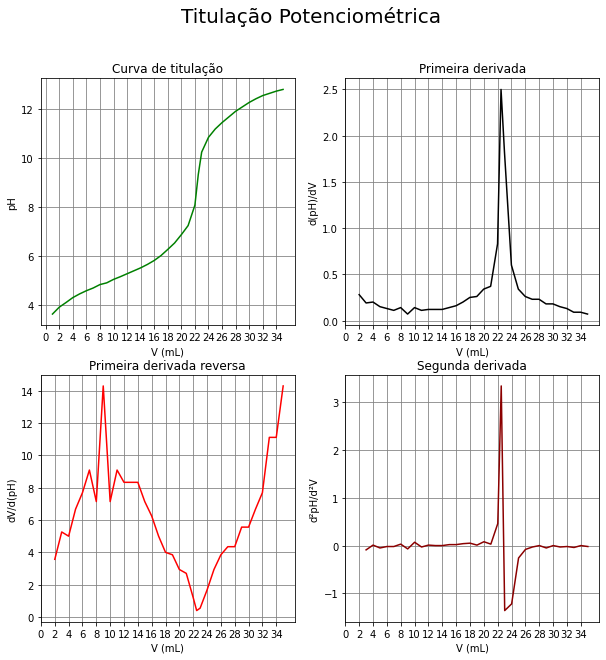

In [339]:
plotar_grafico(dados)

# <span style="color:purple"> 4º Passo: Obtendo dados
Uma vez tratado e visualizado os dados, vamos obter os dados que estamos procurando. Em outras palavras, vamos obter o volume de equivalência através dos gráficos de derivadas.

## <span style="color:purple"> Resolvendo os valores inválidos (NaN) no dataframe 
 
O valor **NaN** significa que é um **valor inválido** em nossos dados, este tipo de valor se trata de um grande problema envolvendo ciência de dados porque muitas vezes os dados coletado possuem estes vazios. Para resolver isto, recomenda-se na **maioria** dos casos que **substitua por 0**. Aqui na biblioteca pandas podemos resolver isto com o método **fillna()** ou **replace()**.\
\
No entanto, substituir o valor inválido no **segundo gráfico** não é uma boa ideia, uma vez que o valor que estamos procurando para encontrar o volume de equivalência é para y=0. Logo, temos que substituir por outro valor que **não seja igual à zero**.
\
\
\
__Material complementar da página GeekforGeeks:__
\
https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
\
\
__Material complementar da página Insight__
\
https://insightlab.ufc.br/6-truques-do-pandas-para-impulsionar-sua-analise-de-dados

In [340]:
def trocar_nan(df):
    df['d1'] = df['d1'].fillna(axis=0, method='bfill')  #ffill substituirá valores anteriores enquando o bfill será valores posteriores
    df['d1r'] = df['d1r'].fillna(axis=0, method='bfill')
    df['d2'] = df['d2'].fillna(axis=0, method='bfill')
    return df
trocar_nan(dados).head()

,V,pH,d1,d1r,d2
1,1.0,3.65,0.28,3.57,-0.09
2,2.0,3.93,0.28,3.57,-0.09
3,3.0,4.12,0.19,5.26,-0.09
4,4.0,4.32,0.20,5.00,0.01
5,5.0,4.47,0.15,6.67,-0.05


## <span style="color:purple">Obtendo volume de equivalência 
  
Sabemos que o **volume de equivalência** é obtido pelos gráficos de primeira derivada, primeira derivada inversa e segunda derivada, o primeiro gráfico verificamos o **valor máximo global**, já o segundo quando o **valor mínimo global** e o terceiro quando **y=0**. 

### Manipulação de dados em  um dataframe
 
Para encontrarmos o **volume de equivalência**, precisa-se encontrar o valor máximo da coluna da primeira derivadas para depois associar o volume correspondente. Este tipo de problema onde se procura um valor ou intervalor de um dataframe é muito comum, o método que utilizaremos será o método **df.loc[]**. Este método possibilita **encontrar a linha de um determinado valor** ou as **linhas de um intervalo**. Neste caso, o valor que precisamos é o valor máximo da coluna 'd1'.

Outro recurso que utilzaremos também nesta etapa o **df.values**, este retorna o *numpy.array* de um DataFrame ou Serie. Com isso, vamos acessar **o volume de equivalência** a através do **index** deste array, semelhante que fizemos com as listas.

In [341]:
dados.loc[dados['d1'] == 0.12]

,V,pH,d1,d1r,d2
12,12.0,5.29,0.12,8.33,0.01
13,13.0,5.41,0.12,8.33,0.00
14,14.0,5.53,0.12,8.33,0.00


### Encontrando Volume de Equivalência no gráfico primeira derivada 

In [342]:
def ve_d1(df):
    return df.loc[df['d1'] == df['d1'].max()].values[0][0]
ve_d1(dados)

def pe_d1(df):
    return df.loc[df['d1'] == df['d1'].max()].values[0][1]
pe_d1(dados)

9.33

### Encontrando Volume de Equivalência no gráfico primeira derivada invertida
 

In [343]:
def ve_d1r(df):
    return df.loc[df['d1r'] == df['d1r'].min()].values[0][0]
ve_d1r(dados)

22.5

### Encontrando Volume de Equivalência no gráfico segunda derivada


In [344]:
def ve_d2(df):
    return df.loc[df['d2'] == 0].values[0][0]
ve_d2(dados)
# valor incorreto 

13.0

## <span style="color:purple">Explorando o problema encontrado no gráfico da segunda derivada.
  
Notamos que o gráfico da segunda derivada, por algum motivo, possui mais de um valor nulo no seu eixo das ordenadas. Com isso, precisamos selecionar a região de interesse para obter um resultado plausível. 

### Selecionando um intervalo de dados
 
Vamos selecionar um intervalo que inclua a zona de máximo/mínimos e que seja próximo ao ponto de equivalência encontrado no gráfico de derivadas.

In [345]:
Vmax = dados.loc[dados['d2'] == dados['d2'].max()].index[0]
Vmin = dados.loc[dados['d2'] == dados['d2'].min()].index[0]

x_r = dados.loc[Vmax:Vmin]['V'].values
y_r = dados.loc[Vmax:Vmin]['d2'].values

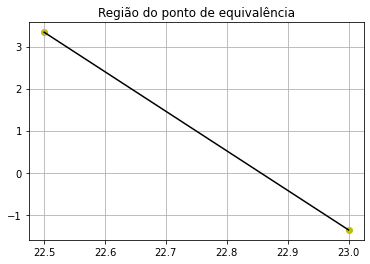

In [346]:
plt.scatter(x_r,y_r, color ='y')
plt.plot(x_r, y_r, color = 'k')
plt.title('Região do ponto de equivalência')
plt.grid()
plt.show()

### Interpolação de gráfico 1-D 

Agora visualizamos o gráfico da segunda derivada na região de interesse, precisamos obter o ponto deste gráfico onde **y=0**. Então, precisamos criar uma **interpolação** para gerar **n pontos** neste gráfico, tendo em vista isso, vamos recorrer o módulo **scipy.interpolate**.  
\
\
\
**Interpolação com módulo Scipy da página **GeekforGeeks**
\
https://www.geeksforgeeks.org/scipy-interpolation/
\
\
**Sobre interpolação**:
\
https://en.wikipedia.org/wiki/Linear_interpolation
\
\
**Documentação do módulo scipy.interpolate**
\
https://docs.scipy.org/doc/scipy/reference/interpolate.html

In [347]:
from scipy.interpolate import interp1d
import numpy as np 

In [348]:
x = dados['V'].values
y = dados['d2'].values

In [349]:
f = interp1d(x,y)

In [350]:
x_i =  np.linspace(22.5,23, num = 1000, endpoint=True)
y_i = f(x_i)
interp = pd.DataFrame({'V':x_i.round(2),'d2':y_i.round(2)})

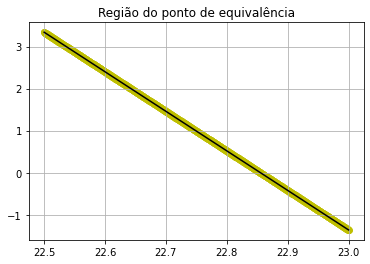

In [351]:
plt.scatter(x_i,y_i, color ='y')
plt.plot(x_r, y_r, color = 'k')
plt.title('Região do ponto de equivalência')
plt.grid()
plt.show()

In [352]:
ve_d2(interp)

22.85

### Regressão Linear 

Através do método de interpolação 1d utilizado na biblioteca **scipy**, foi possível encontrar o volume de equivalência. Vamos continuar explorando este erro para apresentá-los a **regressão linear** usando a biblioteca **sklearn**(). Vale salientar, que esta ferramenta não é necessária para prosseguir com esta aplicação química, no entanto, é muito comum precisarmos construir uma equação de uma reta em diversas aplicações.
\
\
\
**Documentação Sklearn**:
\
https://en.wikipedia.org/wiki/Linear_regression
\
\
**Sobre regressão linear**:
\
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
\
\
**Regressão Linear com Sklearn: Conceito e Aplicação (Medium)**:
\
https://medium.com/@lamartine_sl/regress%C3%A3o-linear-com-sklearn-modelo-de-previs%C3%A3o-de-custos-com-plano-de-sa%C3%BAde-5e963e590f4c)

In [353]:
from sklearn.linear_model import LinearRegression

In [354]:
reg = LinearRegression()

In [355]:
x_i = x_i.reshape(-1,1)

In [356]:
reg = reg.fit(x_i,y_i)

In [357]:
coef_a = reg.coef_[0]

In [358]:
coef_l = reg.intercept_

In [359]:
coef_d = reg.score(x_i,y_i)

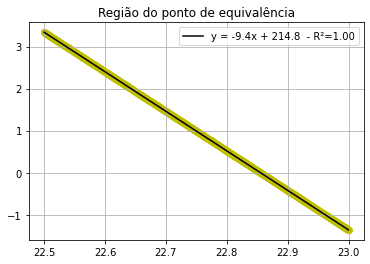

In [360]:
plt.scatter(x_i,y_i, color ='y')
plt.plot(x_r, y_r, color = 'k')
plt.title('Região do ponto de equivalência')
plt.grid()
plt.legend(['y = {0:.1f}x + {1:.1f}  - R²={2:.2f}'.format(coef_a, coef_l,coef_d)])
plt.show()

In [363]:
v_e = round(-coef_l/coef_a,2)
v_e

22.86

# <span style="color:purple"> Último Passo: Apresentando Resultados

Agora temos todos os resultados que o experimentador deve saber para tirar suas conclusões de sua análise. Entretanto, vamos criar um módulo contendo as definições desta aplicação, isto significa que é importante que este módulo entregue os resultado de forma adequada. Assim sendo, vamos entregar as **imagens dos gráficos** em uma extensão de preferência e os **dados das derivadas e volume de equivalência** em uma **planilha Excel**. 

In [375]:
def gerar_df_ve(df):
    return pd.DataFrame({'Primeira Derivada': [ve_d1(df)],'Primeira Derivada. R':[ve_d1r(df)],
                         'Segunda Derivada':[ve_d2(df)]},index=['V(mL)'])
gerar_df_ve(dados)

,Primeira Derivada,Primeira Derivada. R,Segunda Derivada
V(mL),22.5,22.5,13.0


In [376]:
def salvar_df(df):
    resultados = pd.ExcelWriter('titulacao_potenciometrica.xlsx')
    df.to_excel(resultados, sheet_name='Titulação Dados')
    gerar_df_ve(df).to_excel(resultados, sheet_name='Volume de Equivalência')
    return resultados.save()

In [377]:
salvar_df(dados)